In [2]:
import pandas as pd
import numpy as np

In [3]:
# habitat ciudad turistica
df =pd.read_csv(r"C:\Users\JOSUE\Downloads\hackathon\hut_comunicacio_opendata.csv")

#  A continuacion imputaremos los siguientes codigos :
 Para ver la informacion Basica y visualizar si hay nulos , duplicados ,anomalias y datos que no aportan para su gestionamiento

In [4]:
df.shape

(9734, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9734 entries, 0 to 9733
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_EXPEDIENT                  9733 non-null   object 
 1   CODI_DISTRICTE               9733 non-null   float64
 2   DISTRICTE                    9733 non-null   object 
 3   CODI_BARRI                   9728 non-null   float64
 4   BARRI                        9722 non-null   object 
 5   TIPUS_CARRER                 9733 non-null   object 
 6   CARRER                       9733 non-null   object 
 7   TIPUS_NUM                    9733 non-null   float64
 8   NUM1                         9733 non-null   float64
 9   LLETRA1                      117 non-null    object 
 10  NUM2                         813 non-null    float64
 11  LLETRA2                      3 non-null      object 
 12  BLOC                         10 non-null     object 
 13  PORTAL            

In [6]:
df.describe()

,CODI_DISTRICTE,CODI_BARRI,TIPUS_NUM,NUM1,NUM2,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
count,9733.000000,9728.000000,9733.000000,9733.000000,813.000000,9682.000000,9733.000000,9733.000000
mean,3.887599,20.275493,1.468406,134.137881,122.193112,5.967465,2.164041,41.391311
std,2.791807,19.985339,0.499026,150.875594,134.530174,3.514939,0.018064,0.012716
min,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.092180,41.350747
25%,2.000000,7.000000,1.000000,24.000000,23.000000,4.000000,2.153364,41.380769
50%,2.000000,10.000000,1.000000,73.000000,71.000000,5.000000,2.163578,41.391700
75%,6.000000,31.000000,2.000000,201.000000,157.000000,7.000000,2.174010,41.400706
max,10.000000,73.000000,2.000000,1021.000000,1023.000000,79.000000,2.217988,41.450940


In [7]:
df.head(5)

,N_EXPEDIENT,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,LLETRA1,...,LLETRA2,BLOC,PORTAL,ESCALA,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
0,01-2013-0753,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,HOSPITAL,1.0,25.0,NaN,...,NaN,NaN,NaN,NaN,1,2,HUTB-000715,9.0,2.171125,41.379035
1,02-2014-0566,2.0,L'EIXAMPLE,6.0,la Sagrada Família,Avinguda,GAUDI,1.0,51.0,NaN,...,NaN,NaN,NaN,NaN,EN,1,HUTB-010412,7.0,2.173113,41.406595
2,02-2014-0207,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Plaça,TETUAN,1.0,33.0,NaN,...,NaN,NaN,NaN,NaN,SA,2,HUTB-008754,4.0,2.174958,41.393788
3,01-2014-0073,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,JUNTA DE COMERÇ,1.0,23.0,NaN,...,NaN,NaN,NaN,NaN,2,1A,HUTB-013228,4.0,2.170788,41.377598
4,02-2014-1125,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Gran Via,CORTS CATALANES,2.0,682.0,NaN,...,NaN,NaN,NaN,NaN,2,1,HUTB-011029,8.0,2.171954,41.390836


In [8]:
df.isnull().sum()

N_EXPEDIENT                       1
CODI_DISTRICTE                    1
DISTRICTE                         1
CODI_BARRI                        6
BARRI                            12
TIPUS_CARRER                      1
CARRER                            1
TIPUS_NUM                         1
NUM1                              1
LLETRA1                        9617
NUM2                           8921
LLETRA2                        9731
BLOC                           9724
PORTAL                         9694
ESCALA                         9031
PIS                              32
PORTA                           904
NUMERO_REGISTRE_GENERALITAT      35
NUMERO_PLACES                    52
LONGITUD_X                        1
LATITUD_Y                         1
dtype: int64

In [9]:
df.duplicated().sum()

0

Empezaremos por borrar las columnas que no contiene registros y no aportan

In [10]:
columnas_borrar = ['LLETRA1', 'NUM2', 'LLETRA2', 'BLOC', 'PORTAL', 'ESCALA']

In [11]:
df = df.drop(columns=columnas_borrar, errors='ignore')

Segundo Paso Eliminare todas las filas nulas y reseteare el index despues de haber borrado y empezare con las anomalias de cararcter 

In [12]:
df = df.dropna()

In [13]:
df = df.reset_index(drop=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   N_EXPEDIENT                  8753 non-null   object 
 1   CODI_DISTRICTE               8753 non-null   float64
 2   DISTRICTE                    8753 non-null   object 
 3   CODI_BARRI                   8753 non-null   float64
 4   BARRI                        8753 non-null   object 
 5   TIPUS_CARRER                 8753 non-null   object 
 6   CARRER                       8753 non-null   object 
 7   TIPUS_NUM                    8753 non-null   float64
 8   NUM1                         8753 non-null   float64
 9   PIS                          8753 non-null   object 
 10  PORTA                        8753 non-null   object 
 11  NUMERO_REGISTRE_GENERALITAT  8753 non-null   object 
 12  NUMERO_PLACES                8753 non-null   float64
 13  LONGITUD_X        

revisaremos una vez mas el df para ver que informacion necesitaremos y que nos puede servir y lo que no lo borraremos 

In [15]:
df.head(5)

,N_EXPEDIENT,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
0,01-2013-0753,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,HOSPITAL,1.0,25.0,1,2,HUTB-000715,9.0,2.171125,41.379035
1,02-2014-0566,2.0,L'EIXAMPLE,6.0,la Sagrada Família,Avinguda,GAUDI,1.0,51.0,EN,1,HUTB-010412,7.0,2.173113,41.406595
2,02-2014-0207,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Plaça,TETUAN,1.0,33.0,SA,2,HUTB-008754,4.0,2.174958,41.393788
3,01-2014-0073,1.0,CIUTAT VELLA,1.0,el Raval,Carrer,JUNTA DE COMERÇ,1.0,23.0,2,1A,HUTB-013228,4.0,2.170788,41.377598
4,02-2014-1125,2.0,L'EIXAMPLE,7.0,la Dreta de l'Eixample,Gran Via,CORTS CATALANES,2.0,682.0,2,1,HUTB-011029,8.0,2.171954,41.390836


Me he fijado que columna expediente contiene las fechas asi que la extraere solo la fecha la creare en una nueva columna mes y year y despues la pondre como mi indice y la alineare de manera descendente 

In [16]:
df['N_EXPEDIENT'].max()

'10-2023-0039'

In [17]:
df['N_EXPEDIENT'].min()

'01-2009-0354'

In [18]:
df['N_EXPEDIENT'] = pd.to_datetime(df['N_EXPEDIENT'].str.extract(r'(\d{2}-\d{4})', expand=False), format='%m-%Y')

df['Ano_Mes'] = df['N_EXPEDIENT'].dt.to_period('M')

df.set_index('Ano_Mes', inplace=True)
df.sort_index(ascending=False, inplace=True)


In [19]:
del df['N_EXPEDIENT']

In [20]:
df.head(5)

,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y
Ano_Mes,,,,,,,,,,,,,,
2023-10,10.0,SANT MARTI,68.0,el Poblenou,Carrer,LLULL,2.0,140.0,1,1,HUTB-068086,1.0,2.197711,41.396500
2023-10,10.0,SANT MARTI,67.0,la Vila Olímpica del Poblenou,Carrer,ARQUITECTE SERT,1.0,29.0,3,1,HUTB-068084,1.0,2.195781,41.390586
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,2,B,HUTB-073535,1.0,2.180623,41.417185
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,3,A,HUTB-073546,1.0,2.180623,41.417185
2023-09,9.0,SANT ANDREU,57.0,la Trinitat Vella,Passatge,TORNE,1.0,1.0,3,2A,HUTB-071362,1.0,2.190938,41.447212


In [21]:
# Calcular la intensidad (número de lugares por zona)
df['Intensidad'] = df.groupby('CODI_DISTRICTE')['CODI_BARRI'].transform('count')

# Calcular los percentiles
df['Percentil'] = pd.qcut(df['Intensidad'], q=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels=False, duplicates='drop') + 1

# Asignar un valor de 1 a 10 basado en los percentiles
df['Rating'] = pd.cut(df['Percentil'], bins=10, labels=False) + 1



In [22]:
df.head(20)

,CODI_DISTRICTE,DISTRICTE,CODI_BARRI,BARRI,TIPUS_CARRER,CARRER,TIPUS_NUM,NUM1,PIS,PORTA,NUMERO_REGISTRE_GENERALITAT,NUMERO_PLACES,LONGITUD_X,LATITUD_Y,Intensidad,Percentil,Rating
Ano_Mes,,,,,,,,,,,,,,,,,
2023-10,10.0,SANT MARTI,68.0,el Poblenou,Carrer,LLULL,2.0,140.0,1,1,HUTB-068086,1.0,2.197711,41.396500,1036,4,8
2023-10,10.0,SANT MARTI,67.0,la Vila Olímpica del Poblenou,Carrer,ARQUITECTE SERT,1.0,29.0,3,1,HUTB-068084,1.0,2.195781,41.390586,1036,4,8
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,2,B,HUTB-073535,1.0,2.180623,41.417185,72,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,3,A,HUTB-073546,1.0,2.180623,41.417185,72,1,1
2023-09,9.0,SANT ANDREU,57.0,la Trinitat Vella,Passatge,TORNE,1.0,1.0,3,2A,HUTB-071362,1.0,2.190938,41.447212,72,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,4,B,HUTB-073548,1.0,2.180623,41.417185,72,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,3,B,HUTB-073547,1.0,2.180623,41.417185,72,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,1,A,HUTB-073533,1.0,2.180623,41.417185,72,1,1
2023-09,9.0,SANT ANDREU,63.0,Navas,Carrer,LAS NAVAS DE TOLOSA,1.0,379.0,4,A,HUTB-073532,1.0,2.180623,41.417185,72,1,1


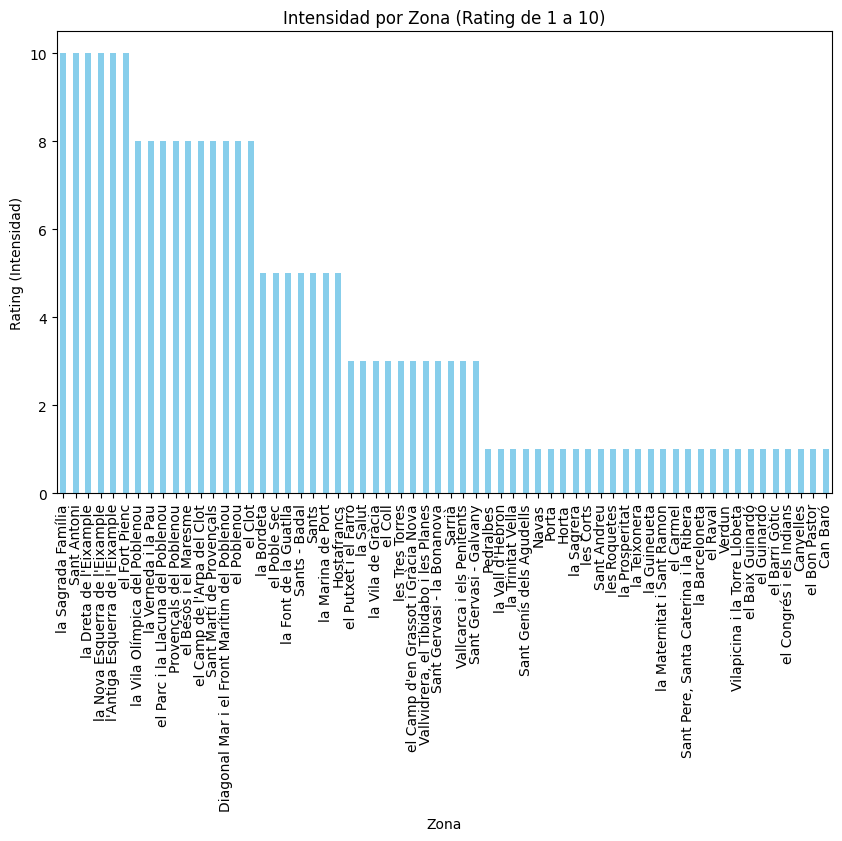

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Crear un gráfico de barras para visualizar la intensidad
plt.figure(figsize=(10, 6))
df.groupby('BARRI')['Rating'].max().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Intensidad por Zona (Rating de 1 a 10)')
plt.xlabel('Zona')
plt.ylabel('Rating (Intensidad)')
plt.show()


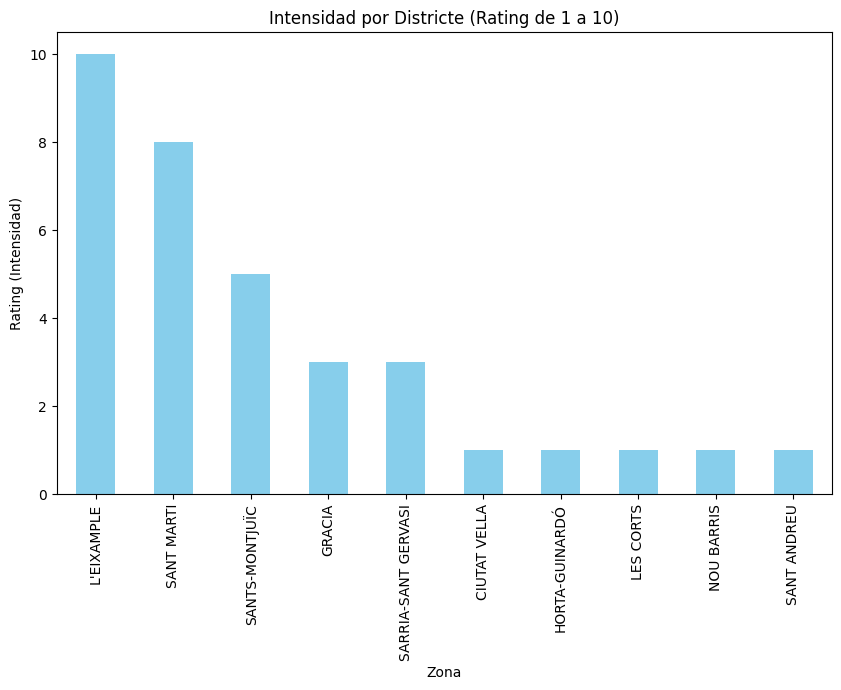

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
# Crear un gráfico de barras para visualizar la intensidad
plt.figure(figsize=(10, 6))
df.groupby('DISTRICTE')['Rating'].max().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Intensidad por Districte (Rating de 1 a 10)')
plt.xlabel('Zona')
plt.ylabel('Rating (Intensidad)')
plt.show()

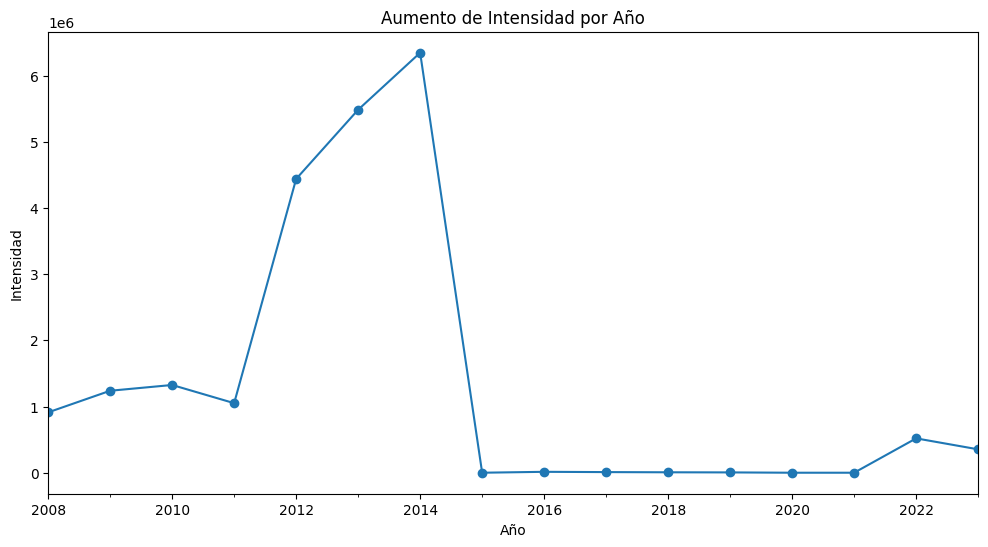

In [25]:
# Agrupar por año y sumar la intensidad
intensidad_por_ano = df.resample('Y')['Intensidad'].sum()

# Crear un gráfico de línea para visualizar la intensidad por año
plt.figure(figsize=(12, 6))
intensidad_por_ano.plot(marker='o')
plt.title('Aumento de Intensidad por Año')
plt.xlabel('Año')
plt.ylabel('Intensidad')
plt.show()

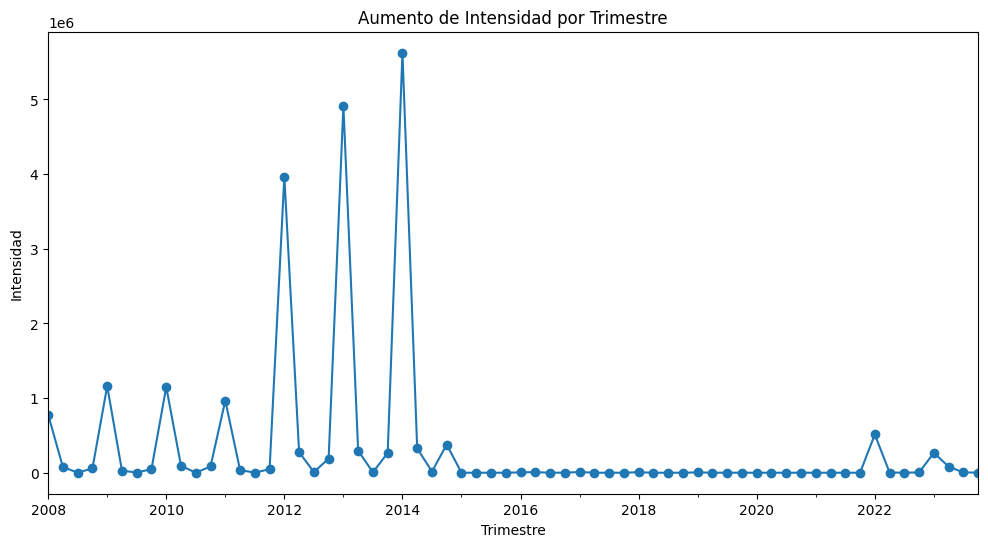

In [26]:
# Agrupar por trimestre y sumar la intensidad
intensidad_por_trimestre = df.resample('Q')['Intensidad'].sum()

# Crear un gráfico de línea para visualizar la intensidad por trimestre
plt.figure(figsize=(12, 6))
intensidad_por_trimestre.plot(marker='o')
plt.title('Aumento de Intensidad por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Intensidad')
plt.show()


In [27]:
# Install the required libraries if you haven't already
# pip install geopandas

import geopandas as gpd

# Load the GeoPackage file = alojamiento de turistas mas recurrentes
file_path = r'C:\Users\JOSUE\Downloads\hackathon\2019_turisme_allotjament.gpkg'
gdf = gpd.read_file(file_path)


In [28]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19892 entries, 0 to 19891
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DN        19892 non-null  int64   
 1   geometry  19892 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 310.9 KB


In [29]:
gdf.shape

(19892, 2)

In [30]:
gdf.head(5)

,DN,geometry
0,11,"POLYGON ((431188.914 4584932.450, 431188.914 4..."
1,11,"POLYGON ((431168.914 4584912.450, 431168.914 4..."
2,11,"POLYGON ((431148.914 4584902.450, 431148.914 4..."
3,12,"POLYGON ((431178.914 4584912.450, 431178.914 4..."
4,12,"POLYGON ((431158.914 4584892.450, 431158.914 4..."


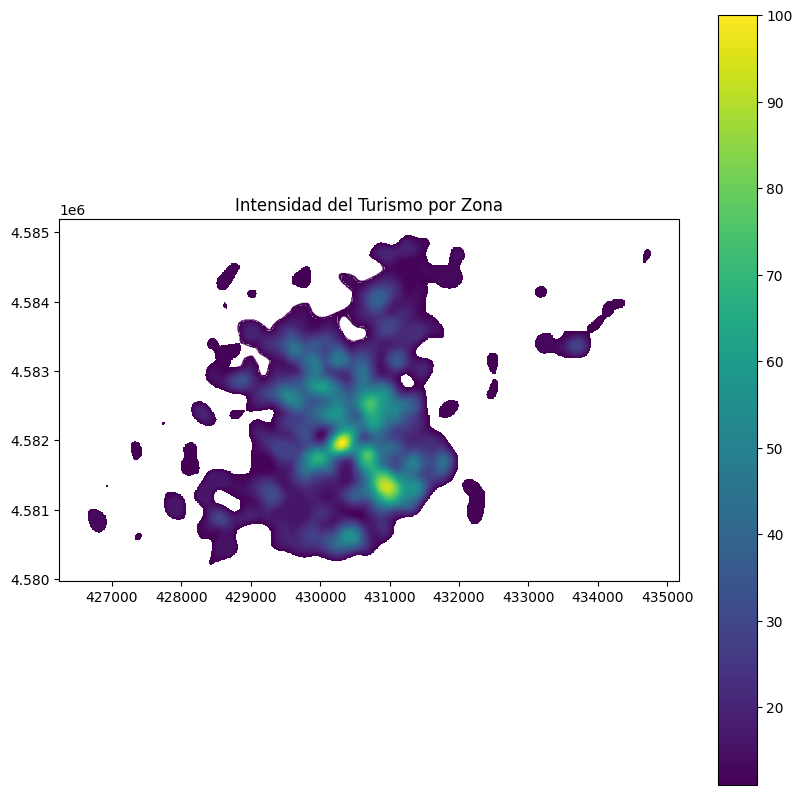

In [31]:
import matplotlib.pyplot as plt

# Visualizar el GeoDataFrame
gdf.plot(column='DN', legend=True, figsize=(10, 10))
plt.title('Intensidad del Turismo por Zona')
plt.show()


In [32]:
# Estadísticas resumidas
summary_stats = gdf['DN'].describe()
print(summary_stats)


count    19892.000000
mean        37.736879
std         17.431802
min         11.000000
25%         24.000000
50%         35.000000
75%         48.000000
max        100.000000
Name: DN, dtype: float64


In [33]:
unique_values = gdf['DN'].unique()
print(unique_values)


[ 11  12  13  15  14  20  19  21  18  16  17  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  40  39  38  41  42  45  44  43  47
  46  48  49  50  51  53  52  54  55  56  57  58  60  61  59  62  63  64
  65  66  67  68  69  70  71  75  74  72  73  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


In [34]:
stats = gdf.groupby('DN').describe()
print(stats)


    geometry                                                               
       count unique                                                top freq
DN                                                                         
11       234    234  POLYGON ((431188.9135999996 4584932.45, 431188...    1
12       253    253  POLYGON ((431178.9135999996 4584912.45, 431178...    1
13       270    270  POLYGON ((431168.9135999996 4584892.45, 431168...    1
14       284    284  POLYGON ((431158.9135999996 4584862.45, 431158...    1
15       291    291  POLYGON ((431168.9135999996 4584862.45, 431168...    1
..       ...    ...                                                ...  ...
96        11     11  POLYGON ((430308.9135999996 4582012.45, 430308...    1
97         7      7  POLYGON ((430298.9135999996 4582002.45, 430298...    1
98         8      8  POLYGON ((430318.9135999996 4582002.45, 430318...    1
99         4      4  POLYGON ((430308.9135999996 4581992.45, 430308...    1
100        1

In [35]:
# Install the required libraries if you haven't already
# pip install geopandas

import geopandas as gpd

# Load the GeoPackage file = intensidad de turistas mas recurrentes
file_path = r'C:\Users\JOSUE\Downloads\hackathon\2019_turisme_intensitat.gpkg'
gdq = gpd.read_file(file_path)

In [36]:
gdq.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Id          121 non-null    int64   
 1   gridcode    121 non-null    int64   
 2   Shape_Leng  121 non-null    float64 
 3   Shape_Area  121 non-null    float64 
 4   geometry    121 non-null    geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 4.9 KB


In [37]:
gdq.head(5)

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,1,2,199.109805,2663.569266,"MULTIPOLYGON (((431408.914 4588332.450, 431365..."
1,2,2,184.918046,2125.287662,"MULTIPOLYGON (((432388.914 4588022.450, 432344..."
2,3,2,248.574737,3964.175597,"MULTIPOLYGON (((431178.914 4587912.450, 431137..."
3,4,2,720.494818,37884.287859,"MULTIPOLYGON (((433068.914 4587822.450, 432978..."
4,5,2,373.067291,10035.408917,"MULTIPOLYGON (((430838.914 4587542.450, 430764..."


In [39]:
import requests
import geopandas as gpd

# Función para geocodificación inversa
def reverse_geocode(lat, lon):
    url = f'https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        address_info = data.get('address', {})
        district = address_info.get('city_district', 'Desconocido')
        neighborhood = address_info.get('neighbourhood', 'Desconocido')
        return district, neighborhood
    else:
        print(f'Error en la solicitud: {response.status_code}')
        return None, None

# Suponiendo que "geometry" es una columna de geometría en tu GeoDataFrame
# y que cada registro es del tipo MULTIPOLYGON
# Asegúrate de ajustar la columna y el nombre de tu GeoDataFrame según tu caso.
gdq['district'] = ''
gdq['neighborhood'] = ''

for idx, row in gdq.iterrows():
    # Obtener las coordenadas del centroide del polígono (puede necesitar ajustes según tu caso)
    centroid = row['geometry'].centroid
    lat, lon = centroid.y, centroid.x
    
    # Aplicar la función de geocodificación inversa
    district, neighborhood = reverse_geocode(lat, lon)

    # Almacenar los resultados en las columnas correspondientes
    gdq.at[idx, 'district'] = district
    gdq.at[idx, 'neighborhood'] = neighborhood

# Visualizar el resultado
print(gdq[['geometry', 'district', 'neighborhood']])



                                              geometry     district   
0    MULTIPOLYGON (((431408.914 4588332.450, 431365...  Desconocido  \
1    MULTIPOLYGON (((432388.914 4588022.450, 432344...  Desconocido   
2    MULTIPOLYGON (((431178.914 4587912.450, 431137...  Desconocido   
3    MULTIPOLYGON (((433068.914 4587822.450, 432978...  Desconocido   
4    MULTIPOLYGON (((430838.914 4587542.450, 430764...  Desconocido   
..                                                 ...          ...   
116  MULTIPOLYGON (((432248.914 4580492.450, 432248...  Desconocido   
117  MULTIPOLYGON (((432268.914 4580552.450, 432268...  Desconocido   
118  MULTIPOLYGON (((431418.914 4580312.450, 431424...  Desconocido   
119  MULTIPOLYGON (((435078.914 4584132.450, 435061...  Desconocido   
120  MULTIPOLYGON (((430328.914 4579312.450, 430224...  Desconocido   

    neighborhood  
0    Desconocido  
1    Desconocido  
2    Desconocido  
3    Desconocido  
4    Desconocido  
..           ...  
116  Desconoci

In [40]:
gdq.head(5)

,Id,gridcode,Shape_Leng,Shape_Area,geometry,district,neighborhood
0,1,2,199.109805,2663.569266,"MULTIPOLYGON (((431408.914 4588332.450, 431365...",Desconocido,Desconocido
1,2,2,184.918046,2125.287662,"MULTIPOLYGON (((432388.914 4588022.450, 432344...",Desconocido,Desconocido
2,3,2,248.574737,3964.175597,"MULTIPOLYGON (((431178.914 4587912.450, 431137...",Desconocido,Desconocido
3,4,2,720.494818,37884.287859,"MULTIPOLYGON (((433068.914 4587822.450, 432978...",Desconocido,Desconocido
4,5,2,373.067291,10035.408917,"MULTIPOLYGON (((430838.914 4587542.450, 430764...",Desconocido,Desconocido


In [42]:
sample_record = gdq.iloc[0]